<a href="https://colab.research.google.com/github/acewolfag/modelFaceNet/blob/main/newnewnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
baocaoai_mtcnndataset_path = kagglehub.dataset_download('duongphan123/face-recognition-dataset')

print('Data source import complete.')


Resuming download from 0 bytes (50623244 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/duongphan123/face-recognition-dataset?dataset_version_number=2 (0/50623244) bytes left.


100%|██████████| 48.3M/48.3M [00:02<00:00, 18.7MB/s]

Extracting files...


Data source import complete.


In [4]:
!pip install torch torchvision torchaudio
!pip install mtcnn opencv-python
!pip install tensorflow
!pip install matplotlib numpy
!pip install facenet-pytorch
!pip install scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.

In [ ]:
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
import cv2
import os

# Kiểm tra GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Sử dụng {len(gpus)} GPU(s):", gpus)
else:
    print("GPU không khả dụng, sử dụng CPU.")

def detect_and_save_faces(input_folder, output_folder, device):
    # Giả sử input_folder là thư mục chứa ảnh
    # Không lặp thêm thư mục con ở đây, vì main code đã làm điều này.
    with tf.device(device):
        detector = MTCNN()

        # Tạo thư mục đầu ra tương ứng
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Duyệt qua các file trong thư mục đầu vào
        for filename in os.listdir(input_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Đọc ảnh
                image_path = os.path.join(input_folder, filename)
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Không thể đọc file {filename}, bỏ qua.")
                    continue

                # Phát hiện khuôn mặt
                detections = detector.detect_faces(image)

                # Cắt và lưu từng khuôn mặt
                for i, detection in enumerate(detections):
                    x, y, width, height = detection['box']
                    x, y = max(0, x), max(0, y)  # Đảm bảo tọa độ không âm
                    cropped_face = image[y:y + height, x:x + width]

                    # Lưu khuôn mặt
                    face_filename = f"{os.path.splitext(filename)[0]}_face{i + 1}.jpg"
                    output_face_path = os.path.join(output_folder, face_filename)
                    cv2.imwrite(output_face_path, cropped_face)

                print(f"Đã xử lý file: {filename} trên {device}")

# Đường dẫn thư mục đầu vào và đầu ra
input_folder = '/kaggle/input/original-images/Original Images'  # Thay bằng đường dẫn tới thư mục ảnh đầu vào
output_folder = '/kaggle/working/new'  # Thay bằng đường dẫn tới thư mục đầu ra

folders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]
num_folders = len(folders)
half = num_folders // 2

gpu_list = tf.config.list_physical_devices('GPU')
num_gpus = len(gpu_list)

if num_gpus < 2:
    # Nếu chỉ có một GPU, bạn có thể xử lý tất cả trên GPU:0
    for folder in folders:
        detect_and_save_faces(
            input_folder=os.path.join(input_folder, folder),
            output_folder=os.path.join(output_folder, folder),
            device="/GPU:0" if num_gpus > 0 else "/CPU:0"
        )
else:
    # Nếu có 2 GPU
    for folder in folders[:half]:
        detect_and_save_faces(
            input_folder=os.path.join(input_folder, folder),
            output_folder=os.path.join(output_folder, folder),
            device="/GPU:0"
        )

    for folder in folders[half:]:
        detect_and_save_faces(
            input_folder=os.path.join(input_folder, folder),
            output_folder=os.path.join(output_folder, folder),
            device="/GPU:1"
        )


In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
class TripletDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.image_paths = {}

        # Filter out classes with no images
        for cls in self.classes:
            class_path = os.path.join(root_dir, cls)
            if os.path.isdir(class_path):
                images = [os.path.join(class_path, img) for img in os.listdir(class_path)
                          if os.path.isfile(os.path.join(class_path, img))]
                if images:  # Only add classes with images
                    self.image_paths[cls] = images
                else:
                    print(f"Warning: Class '{cls}' has no images and will be skipped.")

        # Update classes list to reflect only those with images
        self.classes = list(self.image_paths.keys())

    def __getitem__(self, index):
        # Handle case where no classes have images
        if not self.classes:
            raise ValueError("No classes with images found in the dataset.")

        # Chọn ngẫu nhiên một class
        anchor_class = np.random.choice(self.classes)
        positive_class = anchor_class

        # Ensure negative_class is different from anchor_class and has images
        while True:
            negative_class = np.random.choice(self.classes)
            if negative_class != anchor_class and self.image_paths.get(negative_class, []):
                break

        # Lấy ảnh anchor và positive từ cùng một class, negative từ class khác
        anchor_img = np.random.choice(self.image_paths[anchor_class])
        positive_img = np.random.choice(self.image_paths[positive_class])
        negative_img = np.random.choice(self.image_paths[negative_class])

        # Load ảnh và áp dụng transform
        anchor = Image.open(anchor_img).convert("RGB")
        positive = Image.open(positive_img).convert("RGB")
        negative = Image.open(negative_img).convert("RGB")

        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative

    def __len__(self):
        # Handle case where no classes have images
        if not self.classes:
            return 0
        return len(self.classes) * 10  # Giả định số lượng triplets

In [3]:
!cp -r /root/.cache/kagglehub/datasets/duongphan123/face-recognition-dataset/versions/2 /content/new1

In [4]:
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Dataset và Dataloader
dataset = TripletDataset("/content/new1", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [5]:
class FaceNet(nn.Module):
    def __init__(self, embedding_size=128):
        super(FaceNet, self).__init__()
        # Sử dụng weights thay vì pretrained
        self.inception = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)

        # Tắt aux_logits sau khi khởi tạo
        self.inception.aux_logits = False

        # Thay thế tầng fully connected cuối cùng
        self.inception.fc = nn.Linear(self.inception.fc.in_features, embedding_size)

        # Thêm normalization
        self.l2_normalize = nn.functional.normalize

    def forward(self, x):
        x = self.inception(x)  # Extract features
        x = self.l2_normalize(x, p=2, dim=1)  # L2-normalize the embeddings
        return x


# Khởi tạo mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FaceNet(embedding_size=128).to(device)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 74.5MB/s] 


In [6]:
class TripletLoss(nn.Module):
    def __init__(self, margin=0.2):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        positive_dist = torch.sum((anchor - positive) ** 2, dim=1)
        negative_dist = torch.sum((anchor - negative) ** 2, dim=1)
        loss = torch.clamp(positive_dist - negative_dist + self.margin, min=0.0)
        return loss.mean()

criterion = TripletLoss(margin=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [7]:
def train_with_logging(model, dataloader, criterion, optimizer, epochs, device):
    loss_history = []  # Lưu loss qua các epoch
    accuracy_history = []  # Lưu accuracy qua các epoch

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        correct = 0
        total = 0

        # Thanh tiến trình
        with tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}") as progress:
            for batch in progress:
                anchor, positive, negative = batch
                anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)

                optimizer.zero_grad()

                # Forward pass
                anchor_out = model(anchor)
                positive_out = model(positive)
                negative_out = model(negative)

                loss = criterion(anchor_out, positive_out, negative_out)
                loss.backward()
                optimizer.step()

                # Cập nhật loss và tiến trình
                epoch_loss += loss.item()

                # Accuracy giả lập (triplet loss không có trực tiếp accuracy)
                batch_correct = (torch.norm(anchor_out - positive_out, p=2, dim=1) <
                                 torch.norm(anchor_out - negative_out, p=2, dim=1)).sum().item()
                correct += batch_correct
                total += anchor.size(0)

                progress.set_postfix(loss=loss.item(), accuracy=batch_correct / anchor.size(0))

        # Tính toán độ đo cho epoch
        epoch_loss /= len(dataloader)
        epoch_accuracy = correct / total

        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)

        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Vẽ biểu đồ loss và accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), loss_history, marker='o', label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), accuracy_history, marker='o', label='Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

Epoch 1/500: 100%|██████████| 11/11 [00:29<00:00,  2.71s/it, accuracy=0.3, loss=0.245]


Epoch 1/500 - Loss: 0.1792, Accuracy: 0.5939


Epoch 2/500: 100%|██████████| 11/11 [00:19<00:00,  1.74s/it, accuracy=0.7, loss=0.146]


Epoch 2/500 - Loss: 0.1620, Accuracy: 0.6333


Epoch 3/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=0.8, loss=0.0807]


Epoch 3/500 - Loss: 0.1141, Accuracy: 0.7455


Epoch 4/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=0.8, loss=0.0998]


Epoch 4/500 - Loss: 0.1150, Accuracy: 0.7364


Epoch 5/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.9, loss=0.0665]


Epoch 5/500 - Loss: 0.1007, Accuracy: 0.7727


Epoch 6/500: 100%|██████████| 11/11 [00:19<00:00,  1.80s/it, accuracy=0.6, loss=0.211]


Epoch 6/500 - Loss: 0.0844, Accuracy: 0.8273


Epoch 7/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.6, loss=0.137]


Epoch 7/500 - Loss: 0.0721, Accuracy: 0.8636


Epoch 8/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=0.9, loss=0.0711]


Epoch 8/500 - Loss: 0.0699, Accuracy: 0.8606


Epoch 9/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.024]


Epoch 9/500 - Loss: 0.0606, Accuracy: 0.8667


Epoch 10/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0719]


Epoch 10/500 - Loss: 0.0544, Accuracy: 0.8758


Epoch 11/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.7, loss=0.126]


Epoch 11/500 - Loss: 0.0673, Accuracy: 0.8394


Epoch 12/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0629]


Epoch 12/500 - Loss: 0.0615, Accuracy: 0.8727


Epoch 13/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=0.9, loss=0.042]


Epoch 13/500 - Loss: 0.0519, Accuracy: 0.8879


Epoch 14/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0.00849]


Epoch 14/500 - Loss: 0.0563, Accuracy: 0.8697


Epoch 15/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 15/500 - Loss: 0.0490, Accuracy: 0.8818


Epoch 16/500: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it, accuracy=0.9, loss=0.0367]


Epoch 16/500 - Loss: 0.0472, Accuracy: 0.8879


Epoch 17/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.7, loss=0.118]


Epoch 17/500 - Loss: 0.0599, Accuracy: 0.8697


Epoch 18/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0434]


Epoch 18/500 - Loss: 0.0543, Accuracy: 0.8909


Epoch 19/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0.0282]


Epoch 19/500 - Loss: 0.0272, Accuracy: 0.9515


Epoch 20/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0353]


Epoch 20/500 - Loss: 0.0351, Accuracy: 0.9333


Epoch 21/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0366]


Epoch 21/500 - Loss: 0.0409, Accuracy: 0.9030


Epoch 22/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0]


Epoch 22/500 - Loss: 0.0333, Accuracy: 0.9121


Epoch 23/500: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it, accuracy=0.9, loss=0.0476]


Epoch 23/500 - Loss: 0.0424, Accuracy: 0.9030


Epoch 24/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 24/500 - Loss: 0.0365, Accuracy: 0.9091


Epoch 25/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.00745]


Epoch 25/500 - Loss: 0.0212, Accuracy: 0.9485


Epoch 26/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0.0118]


Epoch 26/500 - Loss: 0.0299, Accuracy: 0.9333


Epoch 27/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0174]


Epoch 27/500 - Loss: 0.0329, Accuracy: 0.9394


Epoch 28/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.7, loss=0.0683]


Epoch 28/500 - Loss: 0.0400, Accuracy: 0.9152


Epoch 29/500: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it, accuracy=0.8, loss=0.0761]


Epoch 29/500 - Loss: 0.0276, Accuracy: 0.9606


Epoch 30/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.00807]


Epoch 30/500 - Loss: 0.0311, Accuracy: 0.9394


Epoch 31/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0.0245]


Epoch 31/500 - Loss: 0.0371, Accuracy: 0.9152


Epoch 32/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=0.8, loss=0.0722]


Epoch 32/500 - Loss: 0.0416, Accuracy: 0.9212


Epoch 33/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0404]


Epoch 33/500 - Loss: 0.0196, Accuracy: 0.9667


Epoch 34/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0221]


Epoch 34/500 - Loss: 0.0248, Accuracy: 0.9455


Epoch 35/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 35/500 - Loss: 0.0193, Accuracy: 0.9636


Epoch 36/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0.0181]


Epoch 36/500 - Loss: 0.0271, Accuracy: 0.9485


Epoch 37/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0.00409]


Epoch 37/500 - Loss: 0.0310, Accuracy: 0.9212


Epoch 38/500: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it, accuracy=0.9, loss=0.0378]


Epoch 38/500 - Loss: 0.0248, Accuracy: 0.9424


Epoch 39/500: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it, accuracy=0.9, loss=0.0456]


Epoch 39/500 - Loss: 0.0315, Accuracy: 0.9333


Epoch 40/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0182]


Epoch 40/500 - Loss: 0.0264, Accuracy: 0.9455


Epoch 41/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 41/500 - Loss: 0.0172, Accuracy: 0.9576


Epoch 42/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0.0107]


Epoch 42/500 - Loss: 0.0267, Accuracy: 0.9424


Epoch 43/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 43/500 - Loss: 0.0275, Accuracy: 0.9424


Epoch 44/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 44/500 - Loss: 0.0216, Accuracy: 0.9576


Epoch 45/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0.00591]


Epoch 45/500 - Loss: 0.0170, Accuracy: 0.9697


Epoch 46/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=0.9, loss=0.0369]


Epoch 46/500 - Loss: 0.0181, Accuracy: 0.9697


Epoch 47/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.7, loss=0.12]


Epoch 47/500 - Loss: 0.0270, Accuracy: 0.9515


Epoch 48/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0614]


Epoch 48/500 - Loss: 0.0188, Accuracy: 0.9758


Epoch 49/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=1, loss=0]


Epoch 49/500 - Loss: 0.0139, Accuracy: 0.9727


Epoch 50/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.00384]


Epoch 50/500 - Loss: 0.0169, Accuracy: 0.9667


Epoch 51/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 51/500 - Loss: 0.0204, Accuracy: 0.9576


Epoch 52/500: 100%|██████████| 11/11 [00:18<00:00,  1.64s/it, accuracy=1, loss=0.00453]


Epoch 52/500 - Loss: 0.0236, Accuracy: 0.9455


Epoch 53/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0.0242]


Epoch 53/500 - Loss: 0.0128, Accuracy: 0.9879


Epoch 54/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0102]


Epoch 54/500 - Loss: 0.0170, Accuracy: 0.9667


Epoch 55/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 55/500 - Loss: 0.0212, Accuracy: 0.9636


Epoch 56/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=0.8, loss=0.0735]


Epoch 56/500 - Loss: 0.0263, Accuracy: 0.9545


Epoch 57/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.00497]


Epoch 57/500 - Loss: 0.0152, Accuracy: 0.9667


Epoch 58/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 58/500 - Loss: 0.0163, Accuracy: 0.9758


Epoch 59/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0371]


Epoch 59/500 - Loss: 0.0100, Accuracy: 0.9879


Epoch 60/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 60/500 - Loss: 0.0169, Accuracy: 0.9697


Epoch 61/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0183]


Epoch 61/500 - Loss: 0.0106, Accuracy: 0.9879


Epoch 62/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0321]


Epoch 62/500 - Loss: 0.0220, Accuracy: 0.9576


Epoch 63/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.00236]


Epoch 63/500 - Loss: 0.0159, Accuracy: 0.9727


Epoch 64/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 64/500 - Loss: 0.0185, Accuracy: 0.9697


Epoch 65/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0439]


Epoch 65/500 - Loss: 0.0200, Accuracy: 0.9576


Epoch 66/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0.00759]


Epoch 66/500 - Loss: 0.0116, Accuracy: 0.9727


Epoch 67/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=0.9, loss=0.0217]


Epoch 67/500 - Loss: 0.0130, Accuracy: 0.9788


Epoch 68/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.0328]


Epoch 68/500 - Loss: 0.0133, Accuracy: 0.9788


Epoch 69/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0]


Epoch 69/500 - Loss: 0.0139, Accuracy: 0.9697


Epoch 70/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 70/500 - Loss: 0.0128, Accuracy: 0.9788


Epoch 71/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 71/500 - Loss: 0.0146, Accuracy: 0.9788


Epoch 72/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 72/500 - Loss: 0.0147, Accuracy: 0.9727


Epoch 73/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 73/500 - Loss: 0.0078, Accuracy: 0.9909


Epoch 74/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.9, loss=0.0256]


Epoch 74/500 - Loss: 0.0111, Accuracy: 0.9788


Epoch 75/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 75/500 - Loss: 0.0048, Accuracy: 0.9909


Epoch 76/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0203]


Epoch 76/500 - Loss: 0.0142, Accuracy: 0.9758


Epoch 77/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 77/500 - Loss: 0.0158, Accuracy: 0.9606


Epoch 78/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.00125]


Epoch 78/500 - Loss: 0.0117, Accuracy: 0.9697


Epoch 79/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 79/500 - Loss: 0.0134, Accuracy: 0.9727


Epoch 80/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0.00317]


Epoch 80/500 - Loss: 0.0136, Accuracy: 0.9667


Epoch 81/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.8, loss=0.0876]


Epoch 81/500 - Loss: 0.0192, Accuracy: 0.9606


Epoch 82/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 82/500 - Loss: 0.0077, Accuracy: 0.9909


Epoch 83/500: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it, accuracy=0.9, loss=0.0648]


Epoch 83/500 - Loss: 0.0123, Accuracy: 0.9818


Epoch 84/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 84/500 - Loss: 0.0145, Accuracy: 0.9667


Epoch 85/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.0129]


Epoch 85/500 - Loss: 0.0111, Accuracy: 0.9818


Epoch 86/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 86/500 - Loss: 0.0065, Accuracy: 0.9848


Epoch 87/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0713]


Epoch 87/500 - Loss: 0.0089, Accuracy: 0.9939


Epoch 88/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 88/500 - Loss: 0.0096, Accuracy: 0.9788


Epoch 89/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 89/500 - Loss: 0.0109, Accuracy: 0.9758


Epoch 90/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0.0107]


Epoch 90/500 - Loss: 0.0107, Accuracy: 0.9727


Epoch 91/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.00594]


Epoch 91/500 - Loss: 0.0128, Accuracy: 0.9727


Epoch 92/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 92/500 - Loss: 0.0091, Accuracy: 0.9818


Epoch 93/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 93/500 - Loss: 0.0103, Accuracy: 0.9727


Epoch 94/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.037]


Epoch 94/500 - Loss: 0.0137, Accuracy: 0.9758


Epoch 95/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 95/500 - Loss: 0.0077, Accuracy: 0.9879


Epoch 96/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 96/500 - Loss: 0.0065, Accuracy: 0.9879


Epoch 97/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0.00895]


Epoch 97/500 - Loss: 0.0059, Accuracy: 0.9939


Epoch 98/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=1, loss=0]


Epoch 98/500 - Loss: 0.0074, Accuracy: 0.9848


Epoch 99/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 99/500 - Loss: 0.0075, Accuracy: 0.9879


Epoch 100/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.0076]


Epoch 100/500 - Loss: 0.0132, Accuracy: 0.9727


Epoch 101/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=0.9, loss=0.0308]


Epoch 101/500 - Loss: 0.0140, Accuracy: 0.9818


Epoch 102/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.9, loss=0.0447]


Epoch 102/500 - Loss: 0.0084, Accuracy: 0.9879


Epoch 103/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 103/500 - Loss: 0.0079, Accuracy: 0.9848


Epoch 104/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 104/500 - Loss: 0.0089, Accuracy: 0.9788


Epoch 105/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 105/500 - Loss: 0.0048, Accuracy: 0.9879


Epoch 106/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 106/500 - Loss: 0.0077, Accuracy: 0.9879


Epoch 107/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0324]


Epoch 107/500 - Loss: 0.0087, Accuracy: 0.9818


Epoch 108/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0363]


Epoch 108/500 - Loss: 0.0103, Accuracy: 0.9818


Epoch 109/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 109/500 - Loss: 0.0066, Accuracy: 0.9909


Epoch 110/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 110/500 - Loss: 0.0110, Accuracy: 0.9758


Epoch 111/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 111/500 - Loss: 0.0045, Accuracy: 0.9909


Epoch 112/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0254]


Epoch 112/500 - Loss: 0.0131, Accuracy: 0.9818


Epoch 113/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 113/500 - Loss: 0.0036, Accuracy: 0.9970


Epoch 114/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0]


Epoch 114/500 - Loss: 0.0060, Accuracy: 0.9848


Epoch 115/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 115/500 - Loss: 0.0118, Accuracy: 0.9697


Epoch 116/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 116/500 - Loss: 0.0082, Accuracy: 0.9848


Epoch 117/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 117/500 - Loss: 0.0075, Accuracy: 0.9848


Epoch 118/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 118/500 - Loss: 0.0088, Accuracy: 0.9818


Epoch 119/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 119/500 - Loss: 0.0065, Accuracy: 0.9848


Epoch 120/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 120/500 - Loss: 0.0056, Accuracy: 0.9879


Epoch 121/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 121/500 - Loss: 0.0046, Accuracy: 0.9879


Epoch 122/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 122/500 - Loss: 0.0069, Accuracy: 0.9818


Epoch 123/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.9, loss=0.0515]


Epoch 123/500 - Loss: 0.0205, Accuracy: 0.9606


Epoch 124/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 124/500 - Loss: 0.0070, Accuracy: 0.9879


Epoch 125/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.9, loss=0.0239]


Epoch 125/500 - Loss: 0.0095, Accuracy: 0.9818


Epoch 126/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=0.9, loss=0.0227]


Epoch 126/500 - Loss: 0.0081, Accuracy: 0.9879


Epoch 127/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 127/500 - Loss: 0.0056, Accuracy: 0.9848


Epoch 128/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.00385]


Epoch 128/500 - Loss: 0.0063, Accuracy: 0.9848


Epoch 129/500: 100%|██████████| 11/11 [00:18<00:00,  1.64s/it, accuracy=1, loss=0]


Epoch 129/500 - Loss: 0.0151, Accuracy: 0.9667


Epoch 130/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.9, loss=0.0393]


Epoch 130/500 - Loss: 0.0122, Accuracy: 0.9788


Epoch 131/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.0174]


Epoch 131/500 - Loss: 0.0092, Accuracy: 0.9879


Epoch 132/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0]


Epoch 132/500 - Loss: 0.0066, Accuracy: 0.9879


Epoch 133/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 133/500 - Loss: 0.0094, Accuracy: 0.9848


Epoch 134/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.00397]


Epoch 134/500 - Loss: 0.0125, Accuracy: 0.9788


Epoch 135/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 135/500 - Loss: 0.0071, Accuracy: 0.9848


Epoch 136/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 136/500 - Loss: 0.0014, Accuracy: 1.0000


Epoch 137/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.000921]


Epoch 137/500 - Loss: 0.0058, Accuracy: 0.9909


Epoch 138/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.00801]


Epoch 138/500 - Loss: 0.0065, Accuracy: 0.9909


Epoch 139/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.00921]


Epoch 139/500 - Loss: 0.0051, Accuracy: 0.9909


Epoch 140/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.00515]


Epoch 140/500 - Loss: 0.0088, Accuracy: 0.9788


Epoch 141/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 141/500 - Loss: 0.0067, Accuracy: 0.9848


Epoch 142/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 142/500 - Loss: 0.0052, Accuracy: 0.9909


Epoch 143/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 143/500 - Loss: 0.0079, Accuracy: 0.9818


Epoch 144/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 144/500 - Loss: 0.0080, Accuracy: 0.9818


Epoch 145/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 145/500 - Loss: 0.0068, Accuracy: 0.9879


Epoch 146/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 146/500 - Loss: 0.0011, Accuracy: 0.9970


Epoch 147/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0456]


Epoch 147/500 - Loss: 0.0111, Accuracy: 0.9818


Epoch 148/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=0.9, loss=0.0872]


Epoch 148/500 - Loss: 0.0133, Accuracy: 0.9848


Epoch 149/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0303]


Epoch 149/500 - Loss: 0.0113, Accuracy: 0.9788


Epoch 150/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 150/500 - Loss: 0.0071, Accuracy: 0.9818


Epoch 151/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 151/500 - Loss: 0.0092, Accuracy: 0.9758


Epoch 152/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.0133]


Epoch 152/500 - Loss: 0.0059, Accuracy: 0.9879


Epoch 153/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 153/500 - Loss: 0.0019, Accuracy: 1.0000


Epoch 154/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 154/500 - Loss: 0.0042, Accuracy: 0.9909


Epoch 155/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 155/500 - Loss: 0.0063, Accuracy: 0.9909


Epoch 156/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0156]


Epoch 156/500 - Loss: 0.0060, Accuracy: 0.9909


Epoch 157/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=1, loss=0.00793]


Epoch 157/500 - Loss: 0.0113, Accuracy: 0.9848


Epoch 158/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0125]


Epoch 158/500 - Loss: 0.0091, Accuracy: 0.9848


Epoch 159/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 159/500 - Loss: 0.0049, Accuracy: 0.9879


Epoch 160/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 160/500 - Loss: 0.0040, Accuracy: 0.9909


Epoch 161/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=0.7, loss=0.121]


Epoch 161/500 - Loss: 0.0137, Accuracy: 0.9879


Epoch 162/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 162/500 - Loss: 0.0030, Accuracy: 0.9970


Epoch 163/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=0.9, loss=0.0266]


Epoch 163/500 - Loss: 0.0075, Accuracy: 0.9879


Epoch 164/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 164/500 - Loss: 0.0024, Accuracy: 1.0000


Epoch 165/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 165/500 - Loss: 0.0078, Accuracy: 0.9788


Epoch 166/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 166/500 - Loss: 0.0044, Accuracy: 0.9909


Epoch 167/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0115]


Epoch 167/500 - Loss: 0.0044, Accuracy: 0.9909


Epoch 168/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 168/500 - Loss: 0.0060, Accuracy: 0.9848


Epoch 169/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 169/500 - Loss: 0.0031, Accuracy: 0.9970


Epoch 170/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 170/500 - Loss: 0.0044, Accuracy: 0.9909


Epoch 171/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 171/500 - Loss: 0.0005, Accuracy: 1.0000


Epoch 172/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.0114]


Epoch 172/500 - Loss: 0.0045, Accuracy: 0.9909


Epoch 173/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 173/500 - Loss: 0.0043, Accuracy: 0.9909


Epoch 174/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 174/500 - Loss: 0.0028, Accuracy: 0.9939


Epoch 175/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 175/500 - Loss: 0.0044, Accuracy: 0.9909


Epoch 176/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 176/500 - Loss: 0.0049, Accuracy: 0.9939


Epoch 177/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 177/500 - Loss: 0.0064, Accuracy: 0.9909


Epoch 178/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 178/500 - Loss: 0.0020, Accuracy: 0.9970


Epoch 179/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 179/500 - Loss: 0.0050, Accuracy: 0.9879


Epoch 180/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.0229]


Epoch 180/500 - Loss: 0.0079, Accuracy: 0.9818


Epoch 181/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 181/500 - Loss: 0.0047, Accuracy: 0.9939


Epoch 182/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 182/500 - Loss: 0.0017, Accuracy: 0.9970


Epoch 183/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.00479]


Epoch 183/500 - Loss: 0.0080, Accuracy: 0.9848


Epoch 184/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=0.9, loss=0.0475]


Epoch 184/500 - Loss: 0.0070, Accuracy: 0.9909


Epoch 185/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 185/500 - Loss: 0.0034, Accuracy: 0.9939


Epoch 186/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 186/500 - Loss: 0.0052, Accuracy: 0.9848


Epoch 187/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 187/500 - Loss: 0.0063, Accuracy: 0.9879


Epoch 188/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 188/500 - Loss: 0.0021, Accuracy: 0.9970


Epoch 189/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 189/500 - Loss: 0.0010, Accuracy: 1.0000


Epoch 190/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 190/500 - Loss: 0.0068, Accuracy: 0.9818


Epoch 191/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.00341]


Epoch 191/500 - Loss: 0.0093, Accuracy: 0.9848


Epoch 192/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 192/500 - Loss: 0.0068, Accuracy: 0.9879


Epoch 193/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.00647]


Epoch 193/500 - Loss: 0.0040, Accuracy: 0.9909


Epoch 194/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=0.8, loss=0.0525]


Epoch 194/500 - Loss: 0.0063, Accuracy: 0.9939


Epoch 195/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 195/500 - Loss: 0.0061, Accuracy: 0.9879


Epoch 196/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 196/500 - Loss: 0.0027, Accuracy: 0.9939


Epoch 197/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 197/500 - Loss: 0.0064, Accuracy: 0.9818


Epoch 198/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 198/500 - Loss: 0.0069, Accuracy: 0.9848


Epoch 199/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0129]


Epoch 199/500 - Loss: 0.0054, Accuracy: 0.9909


Epoch 200/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 200/500 - Loss: 0.0049, Accuracy: 0.9909


Epoch 201/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 201/500 - Loss: 0.0059, Accuracy: 0.9909


Epoch 202/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 202/500 - Loss: 0.0091, Accuracy: 0.9848


Epoch 203/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0139]


Epoch 203/500 - Loss: 0.0098, Accuracy: 0.9848


Epoch 204/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 204/500 - Loss: 0.0054, Accuracy: 0.9909


Epoch 205/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 205/500 - Loss: 0.0041, Accuracy: 0.9939


Epoch 206/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 206/500 - Loss: 0.0053, Accuracy: 0.9879


Epoch 207/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 207/500 - Loss: 0.0064, Accuracy: 0.9848


Epoch 208/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.00462]


Epoch 208/500 - Loss: 0.0030, Accuracy: 0.9970


Epoch 209/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 209/500 - Loss: 0.0022, Accuracy: 0.9909


Epoch 210/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0.0136]


Epoch 210/500 - Loss: 0.0046, Accuracy: 0.9939


Epoch 211/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 211/500 - Loss: 0.0066, Accuracy: 0.9848


Epoch 212/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 212/500 - Loss: 0.0033, Accuracy: 0.9939


Epoch 213/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 213/500 - Loss: 0.0015, Accuracy: 1.0000


Epoch 214/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 214/500 - Loss: 0.0016, Accuracy: 0.9970


Epoch 215/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0.00132]


Epoch 215/500 - Loss: 0.0008, Accuracy: 1.0000


Epoch 216/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0.00237]


Epoch 216/500 - Loss: 0.0021, Accuracy: 0.9970


Epoch 217/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 217/500 - Loss: 0.0012, Accuracy: 0.9970


Epoch 218/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 218/500 - Loss: 0.0038, Accuracy: 0.9909


Epoch 219/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 219/500 - Loss: 0.0015, Accuracy: 1.0000


Epoch 220/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 220/500 - Loss: 0.0028, Accuracy: 0.9970


Epoch 221/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 221/500 - Loss: 0.0059, Accuracy: 0.9909


Epoch 222/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0.000168]


Epoch 222/500 - Loss: 0.0049, Accuracy: 0.9848


Epoch 223/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 223/500 - Loss: 0.0022, Accuracy: 0.9970


Epoch 224/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 224/500 - Loss: 0.0045, Accuracy: 0.9909


Epoch 225/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 225/500 - Loss: 0.0025, Accuracy: 0.9939


Epoch 226/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 226/500 - Loss: 0.0059, Accuracy: 0.9879


Epoch 227/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0.00733]


Epoch 227/500 - Loss: 0.0033, Accuracy: 0.9939


Epoch 228/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 228/500 - Loss: 0.0023, Accuracy: 0.9970


Epoch 229/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.0107]


Epoch 229/500 - Loss: 0.0055, Accuracy: 0.9909


Epoch 230/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=0.9, loss=0.0461]


Epoch 230/500 - Loss: 0.0124, Accuracy: 0.9818


Epoch 231/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 231/500 - Loss: 0.0040, Accuracy: 0.9879


Epoch 232/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 232/500 - Loss: 0.0029, Accuracy: 0.9970


Epoch 233/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 233/500 - Loss: 0.0042, Accuracy: 0.9909


Epoch 234/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.0058]


Epoch 234/500 - Loss: 0.0065, Accuracy: 0.9879


Epoch 235/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 235/500 - Loss: 0.0044, Accuracy: 0.9909


Epoch 236/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 236/500 - Loss: 0.0029, Accuracy: 0.9970


Epoch 237/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 237/500 - Loss: 0.0089, Accuracy: 0.9818


Epoch 238/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.00526]


Epoch 238/500 - Loss: 0.0068, Accuracy: 0.9818


Epoch 239/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 239/500 - Loss: 0.0053, Accuracy: 0.9848


Epoch 240/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 240/500 - Loss: 0.0020, Accuracy: 0.9970


Epoch 241/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=0.9, loss=0.114]


Epoch 241/500 - Loss: 0.0121, Accuracy: 0.9970


Epoch 242/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0.0191]


Epoch 242/500 - Loss: 0.0042, Accuracy: 0.9939


Epoch 243/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 243/500 - Loss: 0.0024, Accuracy: 0.9970


Epoch 244/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 244/500 - Loss: 0.0041, Accuracy: 0.9848


Epoch 245/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 245/500 - Loss: 0.0056, Accuracy: 0.9909


Epoch 246/500: 100%|██████████| 11/11 [00:16<00:00,  1.52s/it, accuracy=1, loss=0]


Epoch 246/500 - Loss: 0.0016, Accuracy: 0.9970


Epoch 247/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.00758]


Epoch 247/500 - Loss: 0.0012, Accuracy: 1.0000


Epoch 248/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=0.9, loss=0.0314]


Epoch 248/500 - Loss: 0.0049, Accuracy: 0.9909


Epoch 249/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 249/500 - Loss: 0.0065, Accuracy: 0.9818


Epoch 250/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 250/500 - Loss: 0.0026, Accuracy: 0.9939


Epoch 251/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.00515]


Epoch 251/500 - Loss: 0.0050, Accuracy: 0.9939


Epoch 252/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 252/500 - Loss: 0.0055, Accuracy: 0.9909


Epoch 253/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 253/500 - Loss: 0.0035, Accuracy: 0.9939


Epoch 254/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0.00307]


Epoch 254/500 - Loss: 0.0029, Accuracy: 0.9939


Epoch 255/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=0.9, loss=0.0477]


Epoch 255/500 - Loss: 0.0112, Accuracy: 0.9848


Epoch 256/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0551]


Epoch 256/500 - Loss: 0.0098, Accuracy: 0.9879


Epoch 257/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=1, loss=0]


Epoch 257/500 - Loss: 0.0081, Accuracy: 0.9818


Epoch 258/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 258/500 - Loss: 0.0016, Accuracy: 0.9970


Epoch 259/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 259/500 - Loss: 0.0031, Accuracy: 0.9970


Epoch 260/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 260/500 - Loss: 0.0021, Accuracy: 0.9970


Epoch 261/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 261/500 - Loss: 0.0049, Accuracy: 0.9879


Epoch 262/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 262/500 - Loss: 0.0030, Accuracy: 0.9939


Epoch 263/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 263/500 - Loss: 0.0055, Accuracy: 0.9909


Epoch 264/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=0.9, loss=0.0313]


Epoch 264/500 - Loss: 0.0049, Accuracy: 0.9939


Epoch 265/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 265/500 - Loss: 0.0039, Accuracy: 0.9879


Epoch 266/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 266/500 - Loss: 0.0069, Accuracy: 0.9879


Epoch 267/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 267/500 - Loss: 0.0048, Accuracy: 0.9939


Epoch 268/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0169]


Epoch 268/500 - Loss: 0.0116, Accuracy: 0.9788


Epoch 269/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 269/500 - Loss: 0.0042, Accuracy: 0.9939


Epoch 270/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=0.9, loss=0.0294]


Epoch 270/500 - Loss: 0.0053, Accuracy: 0.9909


Epoch 271/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 271/500 - Loss: 0.0031, Accuracy: 0.9970


Epoch 272/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 272/500 - Loss: 0.0012, Accuracy: 1.0000


Epoch 273/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0117]


Epoch 273/500 - Loss: 0.0032, Accuracy: 0.9970


Epoch 274/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 274/500 - Loss: 0.0057, Accuracy: 0.9909


Epoch 275/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 275/500 - Loss: 0.0046, Accuracy: 0.9909


Epoch 276/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 276/500 - Loss: 0.0056, Accuracy: 0.9909


Epoch 277/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.00676]


Epoch 277/500 - Loss: 0.0036, Accuracy: 0.9939


Epoch 278/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 278/500 - Loss: 0.0063, Accuracy: 0.9879


Epoch 279/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 279/500 - Loss: 0.0025, Accuracy: 0.9970


Epoch 280/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 280/500 - Loss: 0.0016, Accuracy: 0.9970


Epoch 281/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.0127]


Epoch 281/500 - Loss: 0.0033, Accuracy: 0.9970


Epoch 282/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 282/500 - Loss: 0.0028, Accuracy: 0.9939


Epoch 283/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 283/500 - Loss: 0.0043, Accuracy: 0.9909


Epoch 284/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 284/500 - Loss: 0.0023, Accuracy: 0.9970


Epoch 285/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 285/500 - Loss: 0.0013, Accuracy: 0.9970


Epoch 286/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 286/500 - Loss: 0.0028, Accuracy: 0.9939


Epoch 287/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=0.9, loss=0.0532]


Epoch 287/500 - Loss: 0.0075, Accuracy: 0.9909


Epoch 288/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 288/500 - Loss: 0.0046, Accuracy: 0.9879


Epoch 289/500: 100%|██████████| 11/11 [00:17<00:00,  1.64s/it, accuracy=1, loss=0]


Epoch 289/500 - Loss: 0.0039, Accuracy: 0.9909


Epoch 290/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0119]


Epoch 290/500 - Loss: 0.0048, Accuracy: 0.9939


Epoch 291/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 291/500 - Loss: 0.0043, Accuracy: 0.9909


Epoch 292/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 292/500 - Loss: 0.0039, Accuracy: 0.9909


Epoch 293/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 293/500 - Loss: 0.0027, Accuracy: 0.9909


Epoch 294/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.00181]


Epoch 294/500 - Loss: 0.0029, Accuracy: 1.0000


Epoch 295/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 295/500 - Loss: 0.0003, Accuracy: 1.0000


Epoch 296/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0695]


Epoch 296/500 - Loss: 0.0112, Accuracy: 0.9909


Epoch 297/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 297/500 - Loss: 0.0033, Accuracy: 0.9939


Epoch 298/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 298/500 - Loss: 0.0057, Accuracy: 0.9879


Epoch 299/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 299/500 - Loss: 0.0027, Accuracy: 0.9970


Epoch 300/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 300/500 - Loss: 0.0025, Accuracy: 0.9970


Epoch 301/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 301/500 - Loss: 0.0035, Accuracy: 0.9939


Epoch 302/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.0168]


Epoch 302/500 - Loss: 0.0061, Accuracy: 0.9909


Epoch 303/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=1, loss=0]


Epoch 303/500 - Loss: 0.0075, Accuracy: 0.9879


Epoch 304/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 304/500 - Loss: 0.0031, Accuracy: 0.9939


Epoch 305/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 305/500 - Loss: 0.0042, Accuracy: 0.9909


Epoch 306/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=1, loss=0.021]


Epoch 306/500 - Loss: 0.0057, Accuracy: 0.9909


Epoch 307/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 307/500 - Loss: 0.0045, Accuracy: 0.9939


Epoch 308/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0474]


Epoch 308/500 - Loss: 0.0098, Accuracy: 0.9879


Epoch 309/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 309/500 - Loss: 0.0067, Accuracy: 0.9879


Epoch 310/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.000408]


Epoch 310/500 - Loss: 0.0014, Accuracy: 1.0000


Epoch 311/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 311/500 - Loss: 0.0033, Accuracy: 0.9909


Epoch 312/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 312/500 - Loss: 0.0031, Accuracy: 0.9939


Epoch 313/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 313/500 - Loss: 0.0021, Accuracy: 0.9970


Epoch 314/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=0.9, loss=0.0314]


Epoch 314/500 - Loss: 0.0043, Accuracy: 0.9939


Epoch 315/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 315/500 - Loss: 0.0030, Accuracy: 0.9939


Epoch 316/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.00403]


Epoch 316/500 - Loss: 0.0012, Accuracy: 1.0000


Epoch 317/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.000741]


Epoch 317/500 - Loss: 0.0040, Accuracy: 0.9879


Epoch 318/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 318/500 - Loss: 0.0051, Accuracy: 0.9879


Epoch 319/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 319/500 - Loss: 0.0050, Accuracy: 0.9879


Epoch 320/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 320/500 - Loss: 0.0018, Accuracy: 0.9970


Epoch 321/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 321/500 - Loss: 0.0029, Accuracy: 0.9939


Epoch 322/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 322/500 - Loss: 0.0042, Accuracy: 0.9879


Epoch 323/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 323/500 - Loss: 0.0020, Accuracy: 0.9939


Epoch 324/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=0.9, loss=0.0242]


Epoch 324/500 - Loss: 0.0054, Accuracy: 0.9879


Epoch 325/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 325/500 - Loss: 0.0032, Accuracy: 0.9970


Epoch 326/500: 100%|██████████| 11/11 [00:16<00:00,  1.52s/it, accuracy=1, loss=0]


Epoch 326/500 - Loss: 0.0017, Accuracy: 0.9970


Epoch 327/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 327/500 - Loss: 0.0008, Accuracy: 0.9970


Epoch 328/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 328/500 - Loss: 0.0013, Accuracy: 0.9970


Epoch 329/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.00637]


Epoch 329/500 - Loss: 0.0021, Accuracy: 0.9970


Epoch 330/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 330/500 - Loss: 0.0011, Accuracy: 1.0000


Epoch 331/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 331/500 - Loss: 0.0013, Accuracy: 0.9970


Epoch 332/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 332/500 - Loss: 0.0053, Accuracy: 0.9879


Epoch 333/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 333/500 - Loss: 0.0051, Accuracy: 0.9939


Epoch 334/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 334/500 - Loss: 0.0024, Accuracy: 0.9939


Epoch 335/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.0201]


Epoch 335/500 - Loss: 0.0045, Accuracy: 0.9939


Epoch 336/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0.00156]


Epoch 336/500 - Loss: 0.0052, Accuracy: 0.9939


Epoch 337/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 337/500 - Loss: 0.0038, Accuracy: 0.9909


Epoch 338/500: 100%|██████████| 11/11 [00:17<00:00,  1.62s/it, accuracy=0.9, loss=0.0417]


Epoch 338/500 - Loss: 0.0090, Accuracy: 0.9818


Epoch 339/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0326]


Epoch 339/500 - Loss: 0.0079, Accuracy: 0.9879


Epoch 340/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0714]


Epoch 340/500 - Loss: 0.0135, Accuracy: 0.9818


Epoch 341/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.8, loss=0.102]


Epoch 341/500 - Loss: 0.0150, Accuracy: 0.9879


Epoch 342/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.002]


Epoch 342/500 - Loss: 0.0054, Accuracy: 0.9879


Epoch 343/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 343/500 - Loss: 0.0033, Accuracy: 0.9939


Epoch 344/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.00902]


Epoch 344/500 - Loss: 0.0047, Accuracy: 0.9939


Epoch 345/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 345/500 - Loss: 0.0024, Accuracy: 0.9939


Epoch 346/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.00295]


Epoch 346/500 - Loss: 0.0056, Accuracy: 0.9909


Epoch 347/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 347/500 - Loss: 0.0033, Accuracy: 0.9939


Epoch 348/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.00555]


Epoch 348/500 - Loss: 0.0066, Accuracy: 0.9909


Epoch 349/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 349/500 - Loss: 0.0034, Accuracy: 0.9939


Epoch 350/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0512]


Epoch 350/500 - Loss: 0.0149, Accuracy: 0.9697


Epoch 351/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 351/500 - Loss: 0.0041, Accuracy: 0.9909


Epoch 352/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 352/500 - Loss: 0.0043, Accuracy: 0.9879


Epoch 353/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 353/500 - Loss: 0.0062, Accuracy: 0.9909


Epoch 354/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0442]


Epoch 354/500 - Loss: 0.0083, Accuracy: 0.9909


Epoch 355/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0.00466]


Epoch 355/500 - Loss: 0.0051, Accuracy: 0.9939


Epoch 356/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 356/500 - Loss: 0.0013, Accuracy: 1.0000


Epoch 357/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.0102]


Epoch 357/500 - Loss: 0.0067, Accuracy: 0.9879


Epoch 358/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 358/500 - Loss: 0.0068, Accuracy: 0.9848


Epoch 359/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 359/500 - Loss: 0.0022, Accuracy: 0.9939


Epoch 360/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 360/500 - Loss: 0.0077, Accuracy: 0.9818


Epoch 361/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 361/500 - Loss: 0.0040, Accuracy: 0.9939


Epoch 362/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 362/500 - Loss: 0.0031, Accuracy: 0.9939


Epoch 363/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0.015]


Epoch 363/500 - Loss: 0.0070, Accuracy: 0.9909


Epoch 364/500: 100%|██████████| 11/11 [00:17<00:00,  1.61s/it, accuracy=0.9, loss=0.056]


Epoch 364/500 - Loss: 0.0087, Accuracy: 0.9909


Epoch 365/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.0137]


Epoch 365/500 - Loss: 0.0045, Accuracy: 0.9939


Epoch 366/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.02]


Epoch 366/500 - Loss: 0.0062, Accuracy: 0.9848


Epoch 367/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 367/500 - Loss: 0.0031, Accuracy: 0.9939


Epoch 368/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0.0136]


Epoch 368/500 - Loss: 0.0078, Accuracy: 0.9848


Epoch 369/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 369/500 - Loss: 0.0034, Accuracy: 0.9939


Epoch 370/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 370/500 - Loss: 0.0036, Accuracy: 0.9909


Epoch 371/500: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it, accuracy=0.9, loss=0.0246]


Epoch 371/500 - Loss: 0.0106, Accuracy: 0.9818


Epoch 372/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 372/500 - Loss: 0.0016, Accuracy: 0.9939


Epoch 373/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 373/500 - Loss: 0.0043, Accuracy: 0.9909


Epoch 374/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 374/500 - Loss: 0.0048, Accuracy: 0.9909


Epoch 375/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 375/500 - Loss: 0.0043, Accuracy: 0.9939


Epoch 376/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 376/500 - Loss: 0.0051, Accuracy: 0.9879


Epoch 377/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 377/500 - Loss: 0.0006, Accuracy: 1.0000


Epoch 378/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.9, loss=0.0297]


Epoch 378/500 - Loss: 0.0083, Accuracy: 0.9848


Epoch 379/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 379/500 - Loss: 0.0036, Accuracy: 0.9879


Epoch 380/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 380/500 - Loss: 0.0014, Accuracy: 0.9970


Epoch 381/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 381/500 - Loss: 0.0044, Accuracy: 0.9909


Epoch 382/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=0.9, loss=0.0324]


Epoch 382/500 - Loss: 0.0037, Accuracy: 0.9970


Epoch 383/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 383/500 - Loss: 0.0038, Accuracy: 0.9909


Epoch 384/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 384/500 - Loss: 0.0022, Accuracy: 0.9909


Epoch 385/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 385/500 - Loss: 0.0024, Accuracy: 0.9970


Epoch 386/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 386/500 - Loss: 0.0030, Accuracy: 0.9909


Epoch 387/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 387/500 - Loss: 0.0039, Accuracy: 0.9909


Epoch 388/500: 100%|██████████| 11/11 [00:17<00:00,  1.60s/it, accuracy=1, loss=0]


Epoch 388/500 - Loss: 0.0014, Accuracy: 0.9970


Epoch 389/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 389/500 - Loss: 0.0002, Accuracy: 1.0000


Epoch 390/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 390/500 - Loss: 0.0031, Accuracy: 0.9939


Epoch 391/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 391/500 - Loss: 0.0004, Accuracy: 1.0000


Epoch 392/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 392/500 - Loss: 0.0022, Accuracy: 0.9939


Epoch 393/500: 100%|██████████| 11/11 [00:16<00:00,  1.52s/it, accuracy=1, loss=0.00906]


Epoch 393/500 - Loss: 0.0010, Accuracy: 1.0000


Epoch 394/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 394/500 - Loss: 0.0024, Accuracy: 0.9970


Epoch 395/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 395/500 - Loss: 0.0022, Accuracy: 0.9970


Epoch 396/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 396/500 - Loss: 0.0028, Accuracy: 0.9939


Epoch 397/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 397/500 - Loss: 0.0020, Accuracy: 0.9970


Epoch 398/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 398/500 - Loss: 0.0002, Accuracy: 1.0000


Epoch 399/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 399/500 - Loss: 0.0008, Accuracy: 0.9970


Epoch 400/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 400/500 - Loss: 0.0021, Accuracy: 0.9939


Epoch 401/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.00383]


Epoch 401/500 - Loss: 0.0019, Accuracy: 0.9970


Epoch 402/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 402/500 - Loss: 0.0072, Accuracy: 0.9879


Epoch 403/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 403/500 - Loss: 0.0026, Accuracy: 0.9939


Epoch 404/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 404/500 - Loss: 0.0026, Accuracy: 0.9939


Epoch 405/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 405/500 - Loss: 0.0037, Accuracy: 0.9909


Epoch 406/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 406/500 - Loss: 0.0032, Accuracy: 0.9909


Epoch 407/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 407/500 - Loss: 0.0032, Accuracy: 0.9939


Epoch 408/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 408/500 - Loss: 0.0007, Accuracy: 1.0000


Epoch 409/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 409/500 - Loss: 0.0013, Accuracy: 1.0000


Epoch 410/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 410/500 - Loss: 0.0034, Accuracy: 0.9939


Epoch 411/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 411/500 - Loss: 0.0022, Accuracy: 0.9939


Epoch 412/500: 100%|██████████| 11/11 [00:16<00:00,  1.51s/it, accuracy=1, loss=0]


Epoch 412/500 - Loss: 0.0000, Accuracy: 1.0000


Epoch 413/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 413/500 - Loss: 0.0027, Accuracy: 0.9939


Epoch 414/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.00435]


Epoch 414/500 - Loss: 0.0013, Accuracy: 1.0000


Epoch 415/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 415/500 - Loss: 0.0028, Accuracy: 0.9939


Epoch 416/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 416/500 - Loss: 0.0018, Accuracy: 0.9970


Epoch 417/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 417/500 - Loss: 0.0008, Accuracy: 0.9970


Epoch 418/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 418/500 - Loss: 0.0009, Accuracy: 0.9970


Epoch 419/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 419/500 - Loss: 0.0022, Accuracy: 0.9970


Epoch 420/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.01]


Epoch 420/500 - Loss: 0.0017, Accuracy: 0.9970


Epoch 421/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0397]


Epoch 421/500 - Loss: 0.0071, Accuracy: 0.9909


Epoch 422/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 422/500 - Loss: 0.0009, Accuracy: 1.0000


Epoch 423/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=0.9, loss=0.0385]


Epoch 423/500 - Loss: 0.0049, Accuracy: 0.9939


Epoch 424/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 424/500 - Loss: 0.0002, Accuracy: 1.0000


Epoch 425/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 425/500 - Loss: 0.0015, Accuracy: 0.9970


Epoch 426/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 426/500 - Loss: 0.0020, Accuracy: 0.9970


Epoch 427/500: 100%|██████████| 11/11 [00:16<00:00,  1.52s/it, accuracy=1, loss=0]


Epoch 427/500 - Loss: 0.0009, Accuracy: 0.9970


Epoch 428/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=0.9, loss=0.0242]


Epoch 428/500 - Loss: 0.0044, Accuracy: 0.9909


Epoch 429/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 429/500 - Loss: 0.0022, Accuracy: 0.9970


Epoch 430/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 430/500 - Loss: 0.0016, Accuracy: 0.9970


Epoch 431/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 431/500 - Loss: 0.0021, Accuracy: 0.9939


Epoch 432/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 432/500 - Loss: 0.0015, Accuracy: 1.0000


Epoch 433/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 433/500 - Loss: 0.0007, Accuracy: 1.0000


Epoch 434/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=0.9, loss=0.069]


Epoch 434/500 - Loss: 0.0101, Accuracy: 0.9879


Epoch 435/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 435/500 - Loss: 0.0015, Accuracy: 0.9970


Epoch 436/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 436/500 - Loss: 0.0004, Accuracy: 1.0000


Epoch 437/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 437/500 - Loss: 0.0027, Accuracy: 0.9939


Epoch 438/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 438/500 - Loss: 0.0018, Accuracy: 0.9970


Epoch 439/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 439/500 - Loss: 0.0031, Accuracy: 0.9970


Epoch 440/500: 100%|██████████| 11/11 [00:16<00:00,  1.52s/it, accuracy=1, loss=0]


Epoch 440/500 - Loss: 0.0004, Accuracy: 1.0000


Epoch 441/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 441/500 - Loss: 0.0011, Accuracy: 0.9970


Epoch 442/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 442/500 - Loss: 0.0023, Accuracy: 0.9970


Epoch 443/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 443/500 - Loss: 0.0010, Accuracy: 0.9970


Epoch 444/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0.0163]


Epoch 444/500 - Loss: 0.0018, Accuracy: 1.0000


Epoch 445/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 445/500 - Loss: 0.0023, Accuracy: 0.9970


Epoch 446/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.00823]


Epoch 446/500 - Loss: 0.0028, Accuracy: 0.9939


Epoch 447/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0.0039]


Epoch 447/500 - Loss: 0.0032, Accuracy: 0.9939


Epoch 448/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.0111]


Epoch 448/500 - Loss: 0.0023, Accuracy: 1.0000


Epoch 449/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0.00255]


Epoch 449/500 - Loss: 0.0003, Accuracy: 1.0000


Epoch 450/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 450/500 - Loss: 0.0021, Accuracy: 0.9939


Epoch 451/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 451/500 - Loss: 0.0015, Accuracy: 0.9970


Epoch 452/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 452/500 - Loss: 0.0060, Accuracy: 0.9879


Epoch 453/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 453/500 - Loss: 0.0009, Accuracy: 0.9970


Epoch 454/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 454/500 - Loss: 0.0024, Accuracy: 0.9970


Epoch 455/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.00563]


Epoch 455/500 - Loss: 0.0028, Accuracy: 0.9970


Epoch 456/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 456/500 - Loss: 0.0000, Accuracy: 1.0000


Epoch 457/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 457/500 - Loss: 0.0020, Accuracy: 0.9970


Epoch 458/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 458/500 - Loss: 0.0042, Accuracy: 0.9879


Epoch 459/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 459/500 - Loss: 0.0012, Accuracy: 1.0000


Epoch 460/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 460/500 - Loss: 0.0042, Accuracy: 0.9909


Epoch 461/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 461/500 - Loss: 0.0028, Accuracy: 0.9939


Epoch 462/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 462/500 - Loss: 0.0018, Accuracy: 0.9970


Epoch 463/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 463/500 - Loss: 0.0017, Accuracy: 0.9970


Epoch 464/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 464/500 - Loss: 0.0009, Accuracy: 1.0000


Epoch 465/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 465/500 - Loss: 0.0027, Accuracy: 0.9909


Epoch 466/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 466/500 - Loss: 0.0016, Accuracy: 0.9970


Epoch 467/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 467/500 - Loss: 0.0037, Accuracy: 0.9939


Epoch 468/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0.00647]


Epoch 468/500 - Loss: 0.0024, Accuracy: 0.9970


Epoch 469/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0.0137]


Epoch 469/500 - Loss: 0.0023, Accuracy: 0.9970


Epoch 470/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 470/500 - Loss: 0.0020, Accuracy: 0.9970


Epoch 471/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 471/500 - Loss: 0.0011, Accuracy: 0.9970


Epoch 472/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=0.9, loss=0.0225]


Epoch 472/500 - Loss: 0.0039, Accuracy: 0.9939


Epoch 473/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 473/500 - Loss: 0.0005, Accuracy: 1.0000


Epoch 474/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 474/500 - Loss: 0.0020, Accuracy: 0.9939


Epoch 475/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=0.9, loss=0.0229]


Epoch 475/500 - Loss: 0.0044, Accuracy: 0.9909


Epoch 476/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 476/500 - Loss: 0.0018, Accuracy: 0.9970


Epoch 477/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 477/500 - Loss: 0.0044, Accuracy: 0.9848


Epoch 478/500: 100%|██████████| 11/11 [00:16<00:00,  1.53s/it, accuracy=1, loss=0]


Epoch 478/500 - Loss: 0.0004, Accuracy: 1.0000


Epoch 479/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 479/500 - Loss: 0.0046, Accuracy: 0.9879


Epoch 480/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 480/500 - Loss: 0.0017, Accuracy: 0.9939


Epoch 481/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 481/500 - Loss: 0.0011, Accuracy: 0.9970


Epoch 482/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 482/500 - Loss: 0.0018, Accuracy: 0.9939


Epoch 483/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=1, loss=0]


Epoch 483/500 - Loss: 0.0015, Accuracy: 1.0000


Epoch 484/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 484/500 - Loss: 0.0082, Accuracy: 0.9879


Epoch 485/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=0.9, loss=0.0503]


Epoch 485/500 - Loss: 0.0054, Accuracy: 0.9970


Epoch 486/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 486/500 - Loss: 0.0006, Accuracy: 1.0000


Epoch 487/500: 100%|██████████| 11/11 [00:17<00:00,  1.63s/it, accuracy=1, loss=0]


Epoch 487/500 - Loss: 0.0073, Accuracy: 0.9879


Epoch 488/500: 100%|██████████| 11/11 [00:16<00:00,  1.54s/it, accuracy=1, loss=0]


Epoch 488/500 - Loss: 0.0000, Accuracy: 1.0000


Epoch 489/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 489/500 - Loss: 0.0033, Accuracy: 0.9939


Epoch 490/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 490/500 - Loss: 0.0032, Accuracy: 0.9879


Epoch 491/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=1, loss=0]


Epoch 491/500 - Loss: 0.0059, Accuracy: 0.9879


Epoch 492/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 492/500 - Loss: 0.0072, Accuracy: 0.9848


Epoch 493/500: 100%|██████████| 11/11 [00:17<00:00,  1.55s/it, accuracy=0.9, loss=0.0554]


Epoch 493/500 - Loss: 0.0058, Accuracy: 0.9970


Epoch 494/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 494/500 - Loss: 0.0025, Accuracy: 1.0000


Epoch 495/500: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it, accuracy=1, loss=0]


Epoch 495/500 - Loss: 0.0015, Accuracy: 0.9970


Epoch 496/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0]


Epoch 496/500 - Loss: 0.0035, Accuracy: 0.9939


Epoch 497/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=0.8, loss=0.0614]


Epoch 497/500 - Loss: 0.0088, Accuracy: 0.9909


Epoch 498/500: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it, accuracy=0.9, loss=0.0348]


Epoch 498/500 - Loss: 0.0069, Accuracy: 0.9879


Epoch 499/500: 100%|██████████| 11/11 [00:17<00:00,  1.56s/it, accuracy=1, loss=0.000269]


Epoch 499/500 - Loss: 0.0030, Accuracy: 0.9909


Epoch 500/500: 100%|██████████| 11/11 [00:17<00:00,  1.57s/it, accuracy=1, loss=0]


Epoch 500/500 - Loss: 0.0047, Accuracy: 0.9879


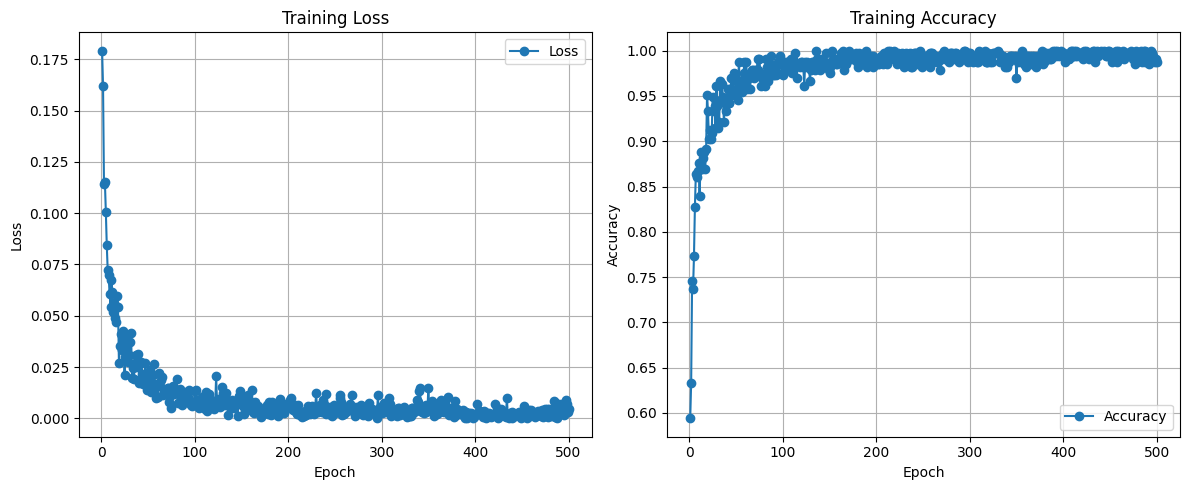

In [8]:
train_with_logging(
    model=model,
    dataloader=dataloader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=500,
    device=device
)

In [9]:
%cd /content/drive/MyDrive
torch.save(model.state_dict(), "facenet_triplet.pth")


/content/drive/MyDrive


In [10]:
model = FaceNet(embedding_size=128).to(device)
model.load_state_dict(torch.load("facenet_triplet.pth"))
model.eval()


FaceNet(
  (inception): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_4a_3x3): Basic

In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split
source_folder = "/content/new1"
train_folder = "/content/train"
val_folder = "/content/val"

# Tạo thư mục train và val nếu chưa có
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Lặp qua tất cả các folder (tương ứng với từng class)
for person in os.listdir(source_folder):
    person_path = os.path.join(source_folder, person)

    # Kiểm tra nếu đó là một folder
    if os.path.isdir(person_path):
        # Lấy danh sách các file trong folder person
        images = os.listdir(person_path)

        # Chia dữ liệu theo tỷ lệ train và val
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Tạo thư mục cho class trong train và val
        train_class_folder = os.path.join(train_folder, person)
        val_class_folder = os.path.join(val_folder, person)
        os.makedirs(train_class_folder, exist_ok=True)
        os.makedirs(val_class_folder, exist_ok=True)

        # Di chuyển file vào thư mục tương ứng
        for image in train_images:
            shutil.copy(os.path.join(person_path, image), os.path.join(train_class_folder, image))

        for image in val_images:
            shutil.copy(os.path.join(person_path, image), os.path.join(val_class_folder, image))

        print(f"Đã hoàn thành phân chia cho class {person}")

print("Đã hoàn tất phân chia dữ liệu!")

Đã hoàn thành phân chia cho class Alia Bhatt
Đã hoàn thành phân chia cho class Brad Pitt
Đã hoàn thành phân chia cho class Jessica Alba
Đã hoàn thành phân chia cho class Kashyap
Đã hoàn thành phân chia cho class Hrithik Roshan
Đã hoàn thành phân chia cho class Margot Robbie
Đã hoàn thành phân chia cho class Akshay Kumar
Đã hoàn thành phân chia cho class Thai Duong
Đã hoàn thành phân chia cho class Amitabh Bachchan
Đã hoàn thành phân chia cho class Dwayne Johnson
Đã hoàn thành phân chia cho class Khanh Huy
Đã hoàn thành phân chia cho class Hugh Jackman
Đã hoàn thành phân chia cho class Tom Cruise
Đã hoàn thành phân chia cho class Vijay Deverakonda
Đã hoàn thành phân chia cho class Elizabeth Olsen
Đã hoàn thành phân chia cho class Zac Efron
Đã hoàn thành phân chia cho class Andy Samberg
Đã hoàn thành phân chia cho class Natalie Portman
Đã hoàn thành phân chia cho class Camila Cabello
Đã hoàn thành phân chia cho class Ellen Degeneres
Đã hoàn thành phân chia cho class Courtney Cox
Đã hoàn 

In [12]:
import os
import argparse
import joblib
import numpy as np
from PIL import Image
from torchvision import transforms, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
import joblib
import random
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
import torch
from sklearn.decomposition import PCA
from sklearn import svm

In [13]:
"""
def whitens(img):
    mean = img.mean()
    std = img.std()
    std_adj = std.clamp(min=1.0 / (float(img.numel()) ** 0.5))  # Đảm bảo std không bằng 0
    y = (img - mean) / std_adj
    return y

def extract_features(mtcnn, facenet, img):
    img = img.to(device)  # Chuyển tensor sang thiết bị
    img = transforms.ToPILImage()(img.squeeze_(0))  # Chuyển tensor thành ảnh PIL
    bbs, _ = mtcnn.detect(img)  # Phát hiện bounding boxes

    if bbs is None:
        # Nếu không phát hiện khuôn mặt
        return None, None

    faces = torch.stack([extract_face(img, bb).to(device) for bb in bbs])  # Trích xuất khuôn mặt và chuyển về thiết bị
    faces = whitens(faces)  # Chuẩn hóa khuôn mặt
    embeddings = facenet(faces).detach().cpu().numpy()  # Trích xuất đặc trưng và chuyển kết quả về CPU để xử lý numpy

    return bbs, embeddings

def dataset_to_embeddings(dataset, mtcnn, facenet):
    transform = transforms.Compose([
        transforms.Resize(1024),
        transforms.ToTensor()
    ])

    embeddings = []
    labels = []
    for img_path, label in dataset.samples:
        print(f"Processing: {img_path}")

        img_tensor = transform(Image.open(img_path).convert('RGB')).unsqueeze_(0).to(device)  # Chuyển ảnh về tensor trên thiết bị
        _, embedding = extract_features(mtcnn, facenet, img_tensor)

        if embedding is None:
            print(f"Could not find face on {img_path}")
            continue
        if embedding.shape[0] > 1:
            print(f"Multiple faces detected for {img_path}, taking the first detected face.")
            embedding = embedding[0, :]  # Chỉ lấy embedding của khuôn mặt đầu tiên

        embeddings.append(embedding.flatten())
        labels.append(label)

    return np.stack(embeddings), labels

def train(embeddings, labels):
    clf = svm.SVC(probability=True)  # SVM với khả năng dự đoán xác suất
    clf.fit(embeddings, labels)
    return clf
"""
def whitens(img):
    """
    Chuẩn hóa ảnh bằng cách trừ mean và chia cho std được điều chỉnh.
    """
    mean = img.mean()
    std = img.std()
    std_adj = std.clamp(min=1.0 / (float(img.numel()) ** 0.5))  # Đảm bảo std không bằng 0
    y = (img - mean) / std_adj
    return y

def extract_features(facenet, img):
    """
    Trích xuất đặc trưng từ ảnh đã được căn chỉnh (crop trước).
    """
    img = img.to(device)  # Chuyển tensor sang thiết bị
    img = whitens(img.unsqueeze(0))  # Chuẩn hóa tensor ảnh
    embedding = facenet(img).detach().cpu().numpy()  # Trích xuất đặc trưng và chuyển về CPU

    return embedding.flatten()

def dataset_to_embeddings(dataset, facenet):
    """
    Chuyển đổi tập dữ liệu thành embeddings và nhãn tương ứng.
    """
    transform = transforms.Compose([
        transforms.Resize((160, 160)),  # Resize ảnh về kích thước cố định cho FaceNet
        transforms.ToTensor()
    ])

    embeddings = []
    labels = []
    for img_path, label in dataset.samples:
        print(f"Processing: {img_path}")
        img_tensor = transform(Image.open(img_path).convert('RGB')).to(device)  # Chuyển ảnh về tensor trên thiết bị

        embedding = extract_features(facenet, img_tensor)

        if embedding is None:
            print(f"Could not extract embedding for {img_path}")
            continue

        embeddings.append(embedding)
        labels.append(label)

    return np.stack(embeddings), labels

def train(embeddings, labels):
    """
    Huấn luyện mô hình SVM với embeddings và nhãn tương ứng.
    """
    clf = svm.SVC(probability=True)  # SVM với khả năng dự đoán xác suất
    clf.fit(embeddings, labels)
    return clf



In [14]:
data_path = source_folder
train_path = train_folder
val_path = val_folder

dataset_train = datasets.ImageFolder(root=train_path)
dataset_val = datasets.ImageFolder(root=val_path)

In [15]:
"""
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


mtcnn = MTCNN(keep_all=True, thresholds=[0.6, 0.7, 0.9], device=device)
X_train, y_train = dataset_to_embeddings(dataset_train, mtcnn, model)
X_test, y_test = dataset_to_embeddings(dataset_val, mtcnn, model)

X_train_class_idx = dataset_train.class_to_idx
X_test_class_idx = dataset_val.class_to_idx

embeddings, labels, class_to_idx = X_train, y_train, X_train_class_idx
"""
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Chuyển đổi ảnh thành embeddings
X_train, y_train = dataset_to_embeddings(dataset_train, model)
X_test, y_test = dataset_to_embeddings(dataset_val, model)

# Lấy danh sách ánh xạ giữa nhãn và chỉ mục lớp
X_train_class_idx = dataset_train.class_to_idx
X_test_class_idx = dataset_val.class_to_idx

# Kết quả cuối
embeddings, labels, class_to_idx = X_train, y_train, X_train_class_idx


Processing: /content/train/Akshay Kumar/Akshay Kumar_0_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_10_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_11_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_12_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_13_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_14_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_16_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_19_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_1_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_20_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_21_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_22_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_23_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_24_face_1.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_25_face_1.j

In [16]:
clf = train(embeddings, labels)
%cd /content/drive/MyDrive
# Save the trained model
joblib.dump(clf, 'face_recognition_model.pkl')

/content/drive/MyDrive


['face_recognition_model.pkl']

In [17]:
idx_to_class = {v: k for k, v in class_to_idx.items()}
print(idx_to_class)

target_names = list(map(lambda i: i[1], sorted(idx_to_class.items(), key=lambda i: i[0])))
print(metrics.classification_report(labels, clf.predict(embeddings), target_names=target_names))

# Predict labels for validation set and calculate accuracy
y_val_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_val_pred)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

{0: 'Akshay Kumar', 1: 'Alexandra Daddario', 2: 'Alia Bhatt', 3: 'Amitabh Bachchan', 4: 'Andy Samberg', 5: 'Anushka Sharma', 6: 'Billie Eilish', 7: 'Brad Pitt', 8: 'Camila Cabello', 9: 'Charlize Theron', 10: 'Claire Holt', 11: 'Courtney Cox', 12: 'Dwayne Johnson', 13: 'Elizabeth Olsen', 14: 'Ellen Degeneres', 15: 'Henry Cavill', 16: 'Hrithik Roshan', 17: 'Hugh Jackman', 18: 'Jessica Alba', 19: 'Kashyap', 20: 'Khanh Huy', 21: 'Lisa Kudrow', 22: 'Margot Robbie', 23: 'Marmik', 24: 'Natalie Portman', 25: 'Priyanka Chopra', 26: 'Robert Downey Jr', 27: 'Roger Federer', 28: 'Thai Duong', 29: 'Tom Cruise', 30: 'Vijay Deverakonda', 31: 'Virat Kohli', 32: 'Zac Efron'}
                    precision    recall  f1-score   support

      Akshay Kumar       0.75      0.53      0.62        40
Alexandra Daddario       0.56      0.75      0.64        73
        Alia Bhatt       0.50      0.49      0.50        63
  Amitabh Bachchan       0.85      0.86      0.86        59
      Andy Samberg       0.61   

In [18]:
import os
import random
import matplotlib.pyplot as plt

def generate_random_color():
    """Hàm tạo màu ngẫu nhiên dưới dạng ký tự của matplotlib"""
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def assign_colors(data_folder):
    """
    Gán màu ngẫu nhiên cho từng class trong thư mục dữ liệu.
    Trả về dictionary với class làm key và màu sắc làm giá trị.
    """
    # Lấy danh sách tất cả các class từ thư mục
    class_labels = [d for d in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, d))]

    # Tạo dictionary gán màu ngẫu nhiên cho mỗi class
    colors = {}
    for label in class_labels:
        colors[label] = generate_random_color()

    return colors

color_mapping = assign_colors(source_folder)

# Lưu label và color vào một mảng
label_color_array = [(label, color) for label, color in color_mapping.items()]

# In ra mảng
print("Label and Color Array:")
for item in label_color_array:
    print(item)

# Nếu cần lưu vào file, bạn có thể thêm:
with open("label_colors.txt", "w") as f:
    for label, color in label_color_array:
        f.write(f"{label}: {color}\n")


Label and Color Array:
('Alia Bhatt', '#d564c6')
('Brad Pitt', '#05d08b')
('Jessica Alba', '#4abd69')
('Kashyap', '#b42fe7')
('Hrithik Roshan', '#af3cdd')
('Margot Robbie', '#1decb5')
('Akshay Kumar', '#1d82a9')
('Thai Duong', '#4a4ac4')
('Amitabh Bachchan', '#b3dc47')
('Dwayne Johnson', '#da5394')
('Khanh Huy', '#b639de')
('Hugh Jackman', '#0cde2a')
('Tom Cruise', '#39ecf4')
('Vijay Deverakonda', '#85e9ae')
('Elizabeth Olsen', '#7e740d')
('Zac Efron', '#f7269d')
('Andy Samberg', '#4a40e1')
('Natalie Portman', '#99297d')
('Camila Cabello', '#129c3b')
('Ellen Degeneres', '#b2e3fd')
('Courtney Cox', '#74cce7')
('Priyanka Chopra', '#da50de')
('Lisa Kudrow', '#b38f51')
('Anushka Sharma', '#856412')
('Alexandra Daddario', '#66bd20')
('Claire Holt', '#218d3b')
('Billie Eilish', '#706bd3')
('Charlize Theron', '#ca4283')
('Virat Kohli', '#105dbb')
('Roger Federer', '#352348')
('Henry Cavill', '#8fd54f')
('Marmik', '#83978f')
('Robert Downey Jr', '#61b251')


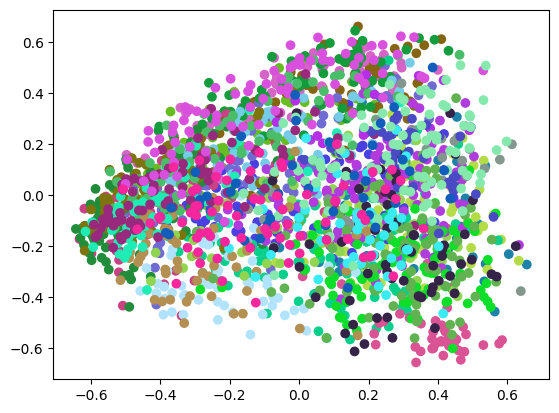

In [19]:
# Use PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=5)
embeddings_2d = pca.fit_transform(X_train)

# Map numeric labels to actual names
mapped_labels = [idx_to_class[label] for label in y_train]

# Define a function to assign colors to labels
# MODIFIED: Use color_mapping dictionary instead of tuple
def assign_colors(label):
    return color_mapping.get(label, 'black')  # Default to black if label not found

# Create color array for all points
colors = list(map(assign_colors, mapped_labels))

# Plot the 2D embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
plt.show()

[[0.02579621 0.00312137 0.01071834 0.03018352 0.0309711  0.00611761
  0.12235204 0.07541358 0.04461708 0.01210904 0.0119588  0.00599369
  0.00209996 0.00924119 0.00429693 0.01597449 0.00708008 0.00316258
  0.04622559 0.01618788 0.00110892 0.0048426  0.01222355 0.01807977
  0.14308053 0.01753162 0.01919244 0.08028285 0.00104331 0.16563461
  0.01230678 0.00677564 0.03427631]]


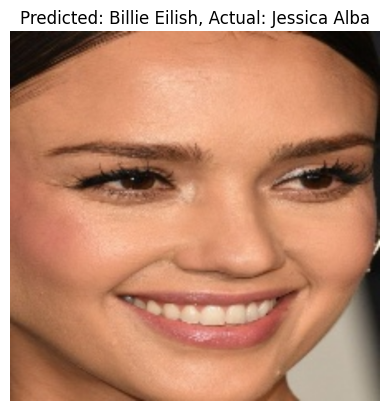

[[0.03339744 0.00100589 0.00187623 0.35112138 0.00599122 0.00212364
  0.02445582 0.06046619 0.00279832 0.00206668 0.00228743 0.00452132
  0.0013852  0.00336254 0.00186201 0.00995656 0.04847963 0.02835781
  0.00807598 0.0064224  0.00068357 0.00348931 0.00264121 0.00793959
  0.03901178 0.00733377 0.08767971 0.07256322 0.00143739 0.12792847
  0.02939818 0.01134876 0.00853133]]


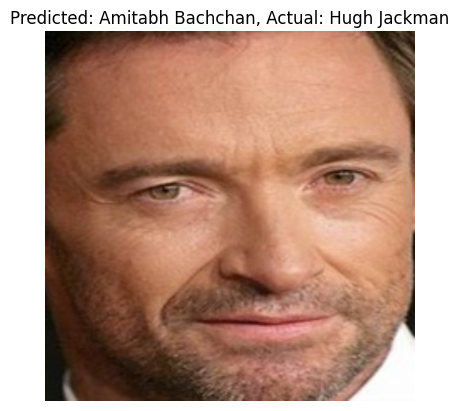

[[0.01841223 0.00748495 0.04199032 0.00628985 0.01406904 0.01873991
  0.18684338 0.05333866 0.1195163  0.02454454 0.02203426 0.00492777
  0.00350079 0.00671076 0.00729463 0.01154372 0.00754634 0.00291071
  0.03420657 0.03688846 0.00347545 0.00421962 0.02046114 0.03199583
  0.06525399 0.03490131 0.00579248 0.08283217 0.00215102 0.05593328
  0.01594995 0.00584164 0.04239894]]


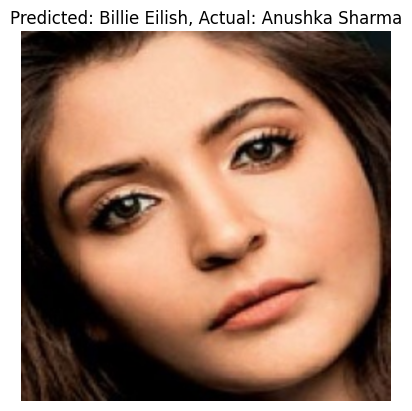

[[0.02287657 0.00153435 0.00379088 0.04010045 0.00961162 0.00308905
  0.04832427 0.11219325 0.00615838 0.0024973  0.00374756 0.00423851
  0.00177913 0.00393318 0.00241069 0.01705076 0.02416644 0.00958312
  0.00919123 0.0148067  0.00089602 0.00320028 0.00421395 0.01279245
  0.0476874  0.01313966 0.04188911 0.16581413 0.00202761 0.24530408
  0.06209601 0.03695765 0.02289821]]


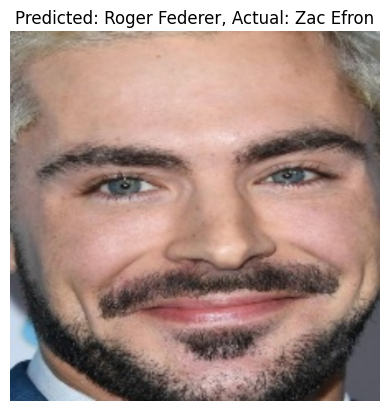

[[0.02234078 0.00355901 0.0177734  0.02169992 0.01082192 0.01308134
  0.18385533 0.05519879 0.02615957 0.00690826 0.0081993  0.00677184
  0.00169423 0.00470522 0.00376926 0.00842336 0.01162225 0.00405916
  0.03287672 0.03062696 0.00125918 0.00372808 0.00909457 0.02581412
  0.07375939 0.05373228 0.01274787 0.0761239  0.00198092 0.21293712
  0.034404   0.00627202 0.01399993]]


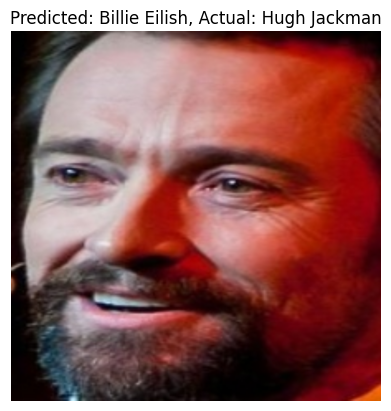

In [36]:
import random
from PIL import Image
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

# Giả sử bạn đã định nghĩa device, model, clf, idx_to_class, và hàm whitens ở đâu đó trong code
# Ví dụ:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = ... # Facenet model đã load
# clf = ...   # Classifier bạn đã train
# idx_to_class = dataset_val.class_to_idx # hoặc dictionary map index -> class name
# whitens = ... # hàm chuẩn hóa ảnh nếu cần

transform_img = transforms.Compose([transforms.Resize(1024)])
transform = transforms.Compose([
    transforms.Resize(1024),
    transforms.ToTensor()
])

dataset_val = datasets.ImageFolder(root="/content/val")
val_samples = dataset_val.samples

random_samples = random.choices(val_samples, k=5)

def extract_features(facenet, img):
    # img: tensor đã transform
    img = img.to(device)
    img = whitens(img.unsqueeze(0))  # Giả sử whitens đã định nghĩa trước, chuẩn hóa ảnh
    embedding = facenet(img).detach().cpu().numpy()
    # Giả sử chỉ có 1 khuôn mặt, embedding shape: (1, D)
    return embedding.flatten()  # Trả về 1D vector

for img_path, true_label in random_samples:
    img_ = transform_img(Image.open(img_path).convert('RGB'))
    img = transform(Image.open(img_path).convert('RGB'))

    # Trích xuất đặc trưng
    embedding = extract_features(model, img)

    # Dự đoán nhãn
    predicted_label = clf.predict(embedding.reshape(1, -1))
    print(clf.predict_proba(embedding.reshape(1, -1)))

    predicted_class = idx_to_class[predicted_label[0]]
    true_class = idx_to_class[true_label]

    plt.imshow(img_)
    plt.title(f'Predicted: {predicted_class}, Actual: {true_class}')
    plt.axis('off')
    plt.show()


[[0.02629489 0.01163975 0.05479719 0.00483018 0.01259847 0.01987326
  0.11770511 0.04266765 0.05853678 0.08903271 0.05900279 0.0040197
  0.00422962 0.0097269  0.00834327 0.01214703 0.01022512 0.00299591
  0.04277755 0.02468766 0.00565607 0.00423191 0.02760818 0.02407684
  0.0710672  0.04487997 0.00412314 0.07349159 0.00226245 0.0389739
  0.01252893 0.00568416 0.0692841 ]]


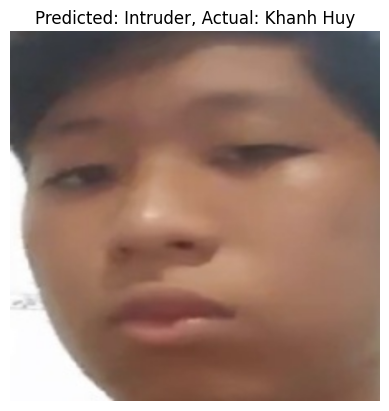

In [46]:
img_path = '/content/new1/Khanh Huy/frame_00550_face_1.jpg'

img_ = transform_img(Image.open(img_path).convert('RGB'))
img = transform(Image.open(img_path).convert('RGB'))

embedding = extract_features(model, img)

predicted_label = clf.predict(embedding.reshape(1, -1))
predicted_class = idx_to_class[predicted_label[0]]

print(clf.predict_proba(embedding.reshape(1, -1)))

thres = 0.6
if np.max(clf.predict_proba(embedding.reshape(1, -1))) < thres:
    predicted_class = 'Intruder'

# Nếu bạn không có true_label và muốn hiển thị cứng "Khanh Huy"
plt.imshow(img_)
plt.title(f'Predicted: {predicted_class}, Actual: {"Khanh Huy"}')
plt.axis('off')
plt.show()
